## I guess I'm going to try migrating all of my tests to this notebook.
We'll see how that goes

Most of my programs in this folder are writen in a fairly notebook ish style, so this type of setup should be natural. I hope.

In [13]:
import kmbio
import math
%matplotlib nbagg
import matplotlib.pyplot as plt
from IPython.display import display
from IPython.display import Image
Image(url='http://bioinfo.unl.edu/images/colorlogo.png')
# Notes at http://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Part%205%20-%20Rich%20Display%20System.ipynb


Source Genome
====
[Paramecium bursaria Chlorella virus 1 (PBCV-1), complete genome](http://www.ncbi.nlm.nih.gov/nuccore/337271990?report=graph)

In [3]:
ls

A185Rexplaination.txt
A185Rexplaination.txt~
AGcounts/
Chlorovirus-genomes.zip
codonToAA.map
codonToAA.map~
Comprehensive-table&summary-table_10-12-2015.txt
Comprehensive-table&summary-table_10-12-2015.xlsx
exported/
exported.tar.gz
gangDisplay.txt
gangGeneNames.txt
gangGeneNames.txt~
gangLable.txt
gangLable.txt~
gangLocTable.txt
Gang Notebook.ipynb
geneGang.fasta
geneGangsDist.py
geneGangsDist.py~
geneGangTests/
geneToClust.txt
geneToClust.txt~
JCEStuff/
nSpectDM.dm
PapersAndData/
Paramecium_bursaria_Chlorella_virus_1_complete_genome.tfa
pbcv1GangdnaSource.txt
runClean.py
runClean.py~
set90.fasta
temp.nwk
testDifferenceNotebook.ipynb
theUglyStuff.py
theUglyStuff.py~
theUglyStuff.pyc
TranscriptSortProteinPref.txt
TranscriptSortProteinPref.txt~


In [3]:
a, b = kmbio.multifna_read('Paramecium_bursaria_Chlorella_virus_1_complete_genome.tfa')
pbcv1 = kmbio.setSequences(a, b)

In [4]:
pbcv1.getProfiles()

0


In [5]:
pbcv1.seqs[0][:100]


'GGGAGAACCAGGTGGGATTGACAGTGGTAAATGTGTTGACCACGAGTAAAAACAGGGCCCGGAAGCGGGGCTATATAGAAGAGCGCAAGAAGAACACATA'

In [6]:
# Ok above this point it's just been loading stuff in


In [7]:
def revComp(seq):
    rc = list(seq[::-1])
    rcd = {"A":"T", "G":"C", 'T':'A', 'C':'G'}
    for i in range(len(rc)):
        try:
            rc[i] = rcd[rc[i]]
        except:
            rc[i] = "N"
   
    return ''.join(rc)

In [8]:
#   From here on out, I'm doing task specific items, 
#   such as IS Element Searching

## Insertion Element (IS Element) searching

In [26]:
def getISElements(seq):
    wordSize = 30
    iseTags = {}
    pruneTags = {}
    for i in range(len(seq)-wordSize):
        word = seq[i:i+wordSize]
        try:
            iseTags[word].append(i)
        except:
            iseTags[word] = [i]
    
    # Get RC: NOTE IS THIS THE RIGHT WAY TO WALK THROUGH IT?
    seq = revComp(seq)[::-1]
    
    for i in range(len(seq)-wordSize):
        word = seq[i:i+wordSize]
        try:
            iseTags[word].append(-i)
        except:
            iseTags[word] = [-i]
    for key, value in iseTags.iteritems():
        if len(value) > 1:
            pruneTags[key] = value
            
    return pruneTags

In [27]:
def minmax(entry):
    return [min([abs(x) for x in entry]),max([abs(x) for x in entry])]

In [28]:
iseTags = getISElements(pbcv1.seqs[0])
print len(iseTags)

3944


In [29]:
ind = 95
print iseTags.keys()[ind], minmax(iseTags[iseTags.keys()[ind]])

ATAACAACTATTTCCGTTTCTGTAGCCTCC [240507, 240606]


Hopefull the below will be a plot over the length of the genome of different IS Elements and their location on the genome

...
We'll see

<IPython.core.display.Javascript object>


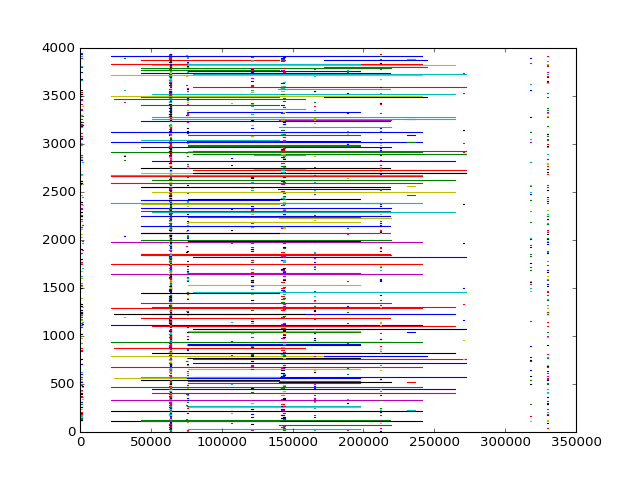

In [30]:
i = 0
ise = plt.plot()
for key in iseTags:
    plt.plot(minmax(iseTags[key]), [i,i])
    i += 1
    #if i > 10:
    #    break

Yay ok. So this is a graph. 
===========================

The y Axis is just the entry number in the dictionary that the IS Element canidate is in,and it's used to help ensure that there is spacing in the graph rather than everything sitting on top of everything else

The x Axis is the position the IS element covers. This is decided by taking the string, and finding the lowest and highest bp that the string is present in, and then plotting a line between the two. As a result, the line drawn is the largest region the IS element can cover, not necessarily the region associated with a gang.

...
I like the notebooks so far.


Anyway, in this graph there are a few interesting things. But I'm bored so I'll come back to this section later.
Maybe.

But that range isn't actually what we want. 
===
It's nice to see, but it's not honed into regions around gangs. It's the largest possible range an IS Element could span, not the function region they're active in


So first we need to get the start and stop bp position of the gang

Then we need to score each possible IS Element around the start and stop of that gang